In [1]:
import pandas as pd
import numpy as np
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
df_obj=ser_obj.unstack(0)
print(df_obj)
#计算最小值有空值如何处理
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)
print(df_obj.min(axis=0, skipna=True))

cloth         a         b         c         d
size                                         
0     -0.072822  2.076755 -0.306070  0.721879
1     -0.140158  1.090813 -0.972902 -0.562979
2      1.592781 -1.327033  2.276517 -0.139844
cloth         a         b         c         d
size                                         
0     -0.072822       NaN -0.306070  0.721879
1     -0.140158  1.090813 -0.972902 -0.562979
2      1.592781 -1.327033  2.276517 -0.139844
--------------------------------------------------
cloth
a   -0.140158
b   -1.327033
c   -0.972902
d   -0.562979
dtype: float64


In [2]:
#观察数据分布的一种 非常常用方法
print(df_obj.describe())

cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean   0.459934 -0.118110  0.332515  0.006352
std    0.981652  1.709675  1.716253  0.654786
min   -0.140158 -1.327033 -0.972902 -0.562979
25%   -0.106490 -0.722572 -0.639486 -0.351411
50%   -0.072822 -0.118110 -0.306070 -0.139844
75%    0.759979  0.486351  0.985223  0.291018
max    1.592781  1.090813  2.276517  0.721879


In [3]:
df_obj.loc[:,'c']

size
0   -0.306070
1   -0.972902
2    2.276517
Name: c, dtype: float64

In [4]:
#计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin())#argmin和argmax只能是series，不能是df

1


In [5]:
df_obj

cloth,a,b,c,d
size,,,,
0,-0.072822,NaN,-0.306070,0.721879
1,-0.140158,1.090813,-0.972902,-0.562979
2,1.592781,-1.327033,2.276517,-0.139844


In [6]:
#返回的是一个series
#计算最小值或者最大值的索引值
df_obj.idxmin(axis=0, skipna=True)

cloth
a    1
b    2
c    1
d    1
dtype: int64

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info()) #查看数据的信息
print(df.head()) #查看数值类型的数据的信息

df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'IMDB-Movie-Data.csv'

In [11]:
#这1000部电影有多少导演和演员
# # 获取平均评分
# print(df["Rating"].mean())
print('-'*50)
# 导演的人数
print(len(set(df["Director"].tolist())))
print(len(df["Director"].unique())) #推荐这种方式

--------------------------------------------------
644
644


In [12]:
# # 获取演员的人数 #二维列表
temp_actors_list = df["Actors"].str.split(", ").tolist()
# print(temp_actors_list)
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list)) #set去重
print(actors_num) #演员的数量

2015


In [14]:
#想知道每个演员出演的电影数量
u,indices = np.unique(actors_list,return_counts = True)
print (u)
indices

['50 Cent' 'A.C. Peterson' 'AJ Michalka' ... 'Émilie Leclerc'
 'Ólafur Darri Ólafsson' 'Óscar Jaenada']


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### 8.3.1 电影时长的关系

66 191
125
--------------------------------------------------


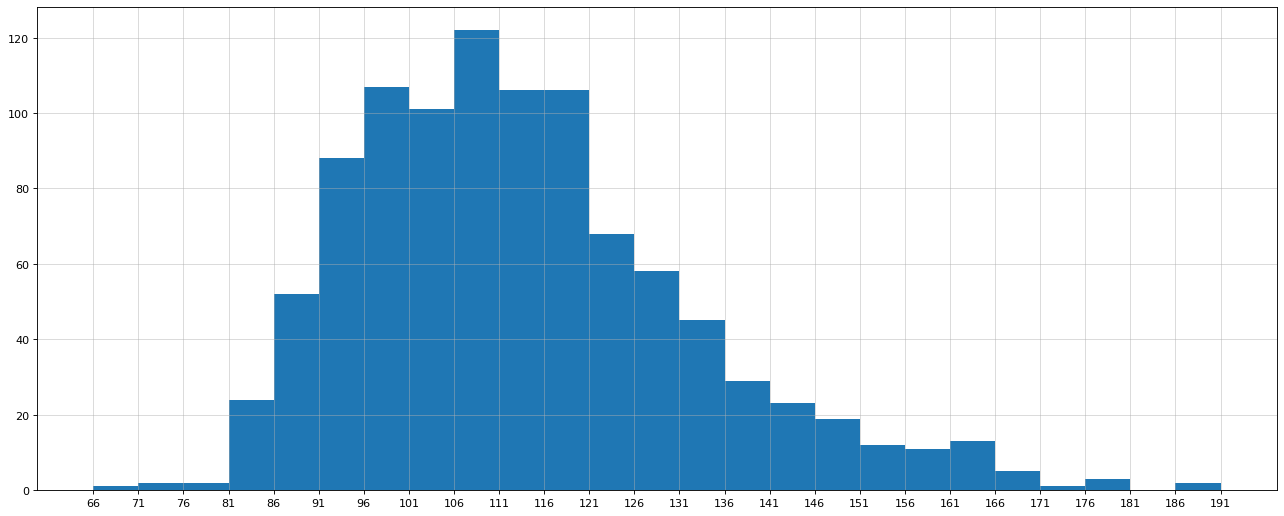

In [18]:
# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print(min_runtime,max_runtime)
# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5) #alpha是透明度
#range第三个参数是步长
plt.xticks(range(min_runtime, max_runtime + 5,5))

plt.show()

In [20]:
#电影评分的分布情况
# 获取平均评分
print(df["Rating"].mean())

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values
print(type(runtime_data))
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime) #最大值最小值电影评分

6.723199999999999
<class 'numpy.ndarray'>
--------------------------------------------------
9.0 1.9


最大评分减去最小评分为7.1
组数为14.0


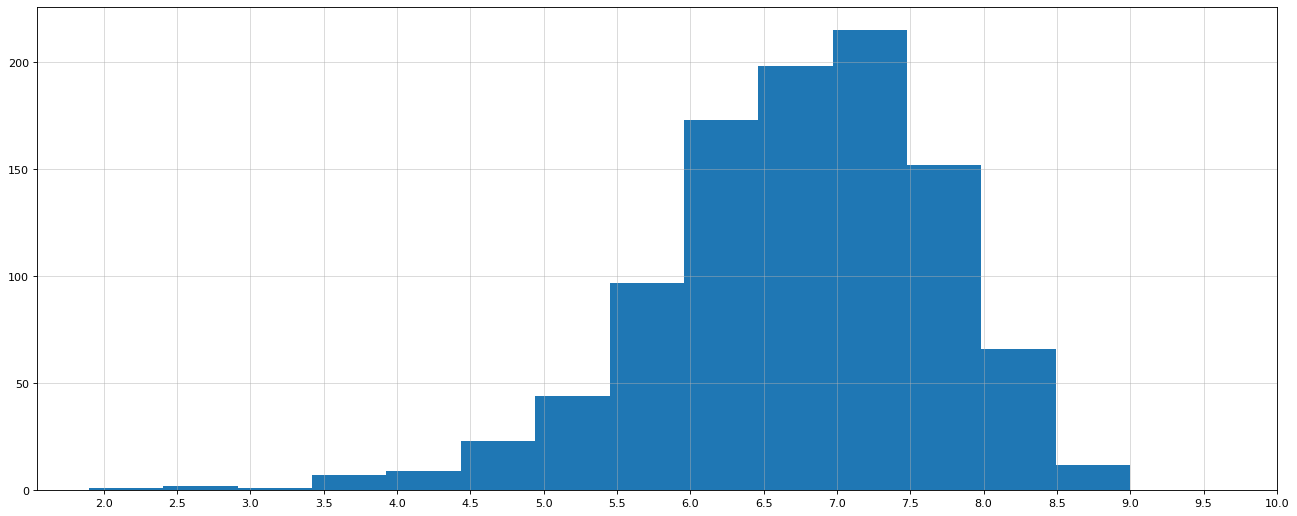

In [22]:
# 计算组数
print(f'最大评分减去最小评分为{max_runtime - min_runtime}')
num_bin = (max_runtime - min_runtime) // 0.5

print(f'组数为{num_bin}')
# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5)
#因为range的步长不支持0.5,自己做一个列表
_x = [min_runtime+0.1]
i = min_runtime+0.1
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x) #设置x轴的刻度

plt.show()

### 8.3.3 导演要拍什么题材电影

In [ ]:


print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型

In [23]:
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为一维
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list)) # 20个题材类型
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

20
     Western  Mystery  Action  Thriller  Sci-Fi  History  Animation  Family  \
0        0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
1        0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
2        0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
3        0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
4        0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
..       ...      ...     ...       ...     ...      ...        ...     ...   
995      0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
996      0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
997      0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
998      0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   
999      0.0      0.0     0.0       0.0     0.0      0.0        0.0     0.0   

     Drama  Adventure  Sport  Music  Comedy  War

In [24]:
# 给每个电影出现分类的位置赋值1,one-hot的中文是独热码
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    #temp_list是二维列表，temp_list[i]是一个一维列表
    zeros_df.loc[i, temp_list[i]] = 1 #temp_list[i]是一个列表，里面是分类

zeros_df.head(3)

,Western,Mystery,Action,Thriller,Sci-Fi,History,Animation,Family,Drama,Adventure,Sport,Music,Comedy,War,Horror,Crime,Musical,Romance,Biography,Fantasy
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)

Western        7.0
Mystery      106.0
Action       303.0
Thriller     195.0
Sci-Fi       120.0
History       29.0
Animation     49.0
Family        51.0
Drama        513.0
Adventure    259.0
Sport         18.0
Music         16.0
Comedy       279.0
War           13.0
Horror       119.0
Crime        150.0
Musical        5.0
Romance      141.0
Biography     81.0
Fantasy      101.0
dtype: float64


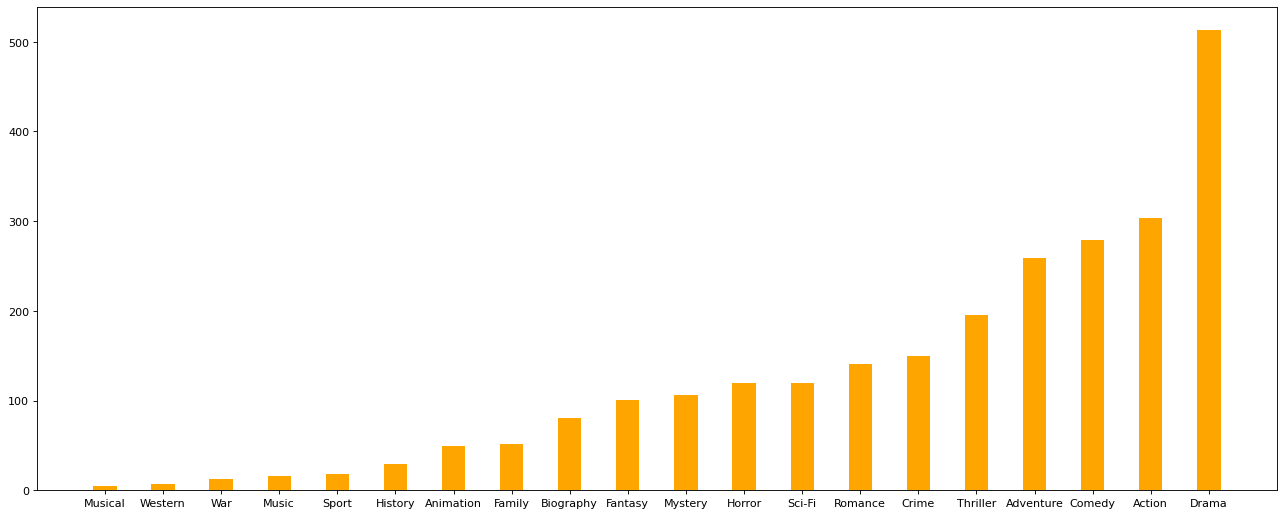

In [26]:
# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()